In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/prana/OneDrive/Desktop/New folder/pjts/Customer-Churn-analysis-main/Customer-Churn-analysis-main/Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
df.info() #for inspection of the data 'EDA churn anaalysis'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is  0  and No Total Charges are recorded.

In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", "0 ")

In [5]:
df['TotalCharges'] =df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['customerID'].duplicated().sum()

np.int64(0)

In [11]:
def conv(value):
    if value ==1 :
        return "yes"
    else:
        return "no" 

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)


In [12]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


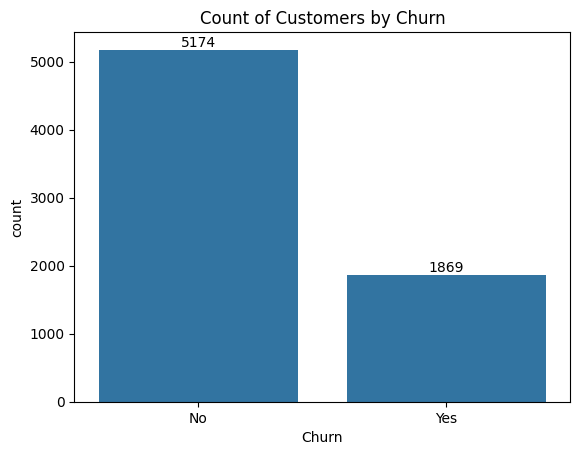

In [13]:
aa = sns.countplot(x='Churn', data = df)
aa.bar_label(aa.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

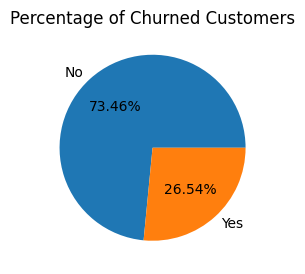

In [14]:
plt.figure(figsize=(3,4))
gby = df.groupby('Churn').agg({'Churn': 'count'})
plt.title('Percentage of Churned Customers', fontsize = 12)
plt.pie(gby['Churn'], labels=gby.index , autopct='%1.2f%%')
plt.show()

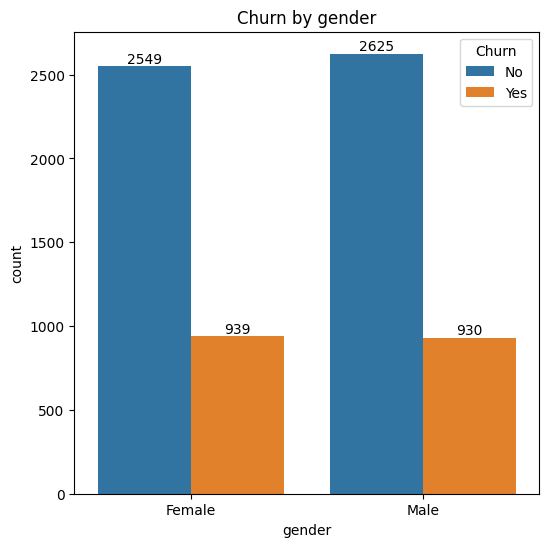

In [15]:

plt.figure(figsize= (6,6))
bb = sns.countplot(x= 'gender', data=df, hue = 'Churn')
for container in bb.containers:
    bb.bar_label(container)
plt.title('Churn by gender')
plt.show()

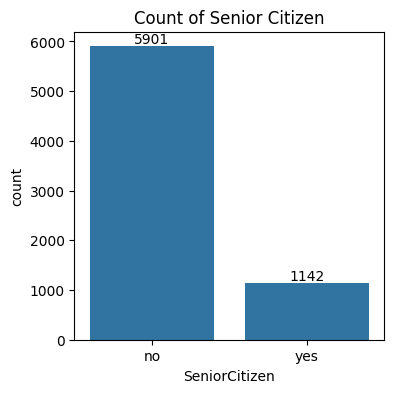

In [16]:
plt.figure(figsize= (4,4))
cc = sns.countplot(x= 'SeniorCitizen', data=df)
for container in cc.containers:
    cc.bar_label(container)
plt.title('Count of Senior Citizen')
plt.show()

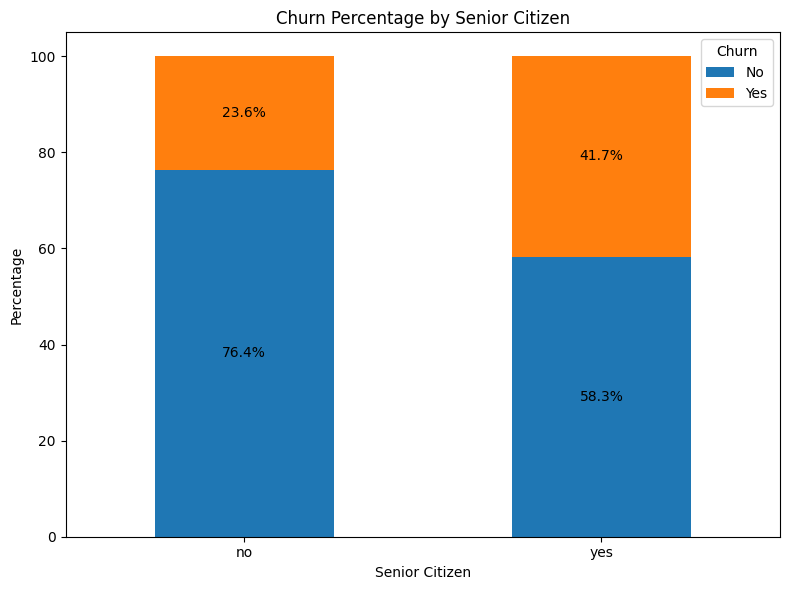

In [17]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Calculate percentages
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
grouped['Total'] = grouped.sum(axis=1)
for col in grouped.columns[:-1]:  # Iterate through 'Yes' and 'No' columns
    grouped[col] = (grouped[col] / grouped['Total']) * 100

# Create stacked bar chart
grouped[['No', 'Yes']].plot(kind='bar', stacked=True, ax=plt.gca())

# Add labels with percentages
for i, (index, row) in enumerate(grouped.iterrows()):
    no_percent = row['No']
    yes_percent = row['Yes']
    total_percent = no_percent + yes_percent

    plt.text(i, no_percent / 2, f'{no_percent:.1f}%', ha='center', va='center', color='black')
    plt.text(i, no_percent + yes_percent / 2, f'{yes_percent:.1f}%', ha='center', va='center', color='black')

plt.title('Churn Percentage by Senior Citizen', fontsize = 12)
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Churn')  # Add legend title

plt.tight_layout() # Adjust layout to prevent clipping of labels
plt.show()

Comparatively a great perecntage of senior citizen category have churned

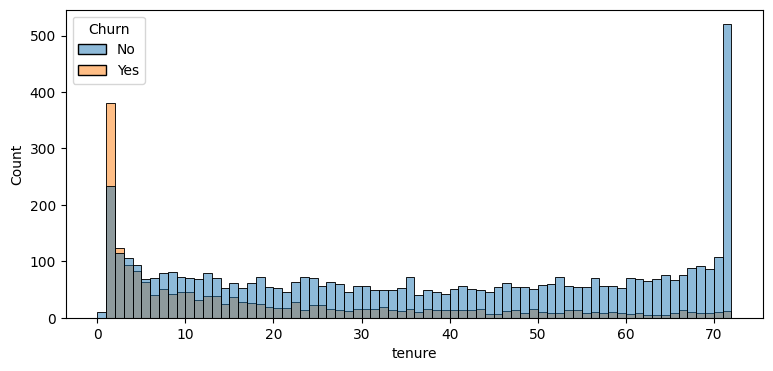

In [18]:
plt.figure(figsize= (9,4))
dd= sns.histplot(x= 'tenure',data=df, bins= 72, hue='Churn')
plt.show()

People who have used our services for a long time stayed and people who have used for 1or2 months have churned


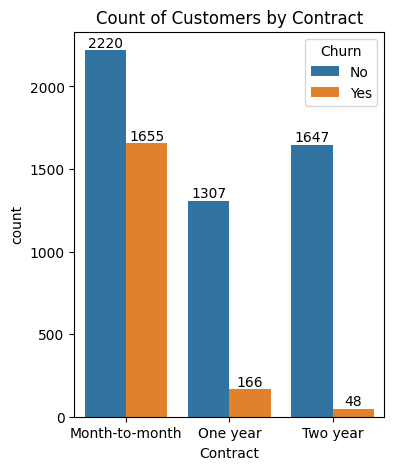

In [19]:
plt.figure(figsize= (4,5))
cc = sns.countplot(x= 'Contract', data=df, hue='Churn')
for container in cc.containers:
    cc.bar_label(container)
plt.title('Count of Customers by Contract')
plt.show()

People who have month-to-month contract are likely to churn out than that of 1 yr and 2 yr

In [20]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

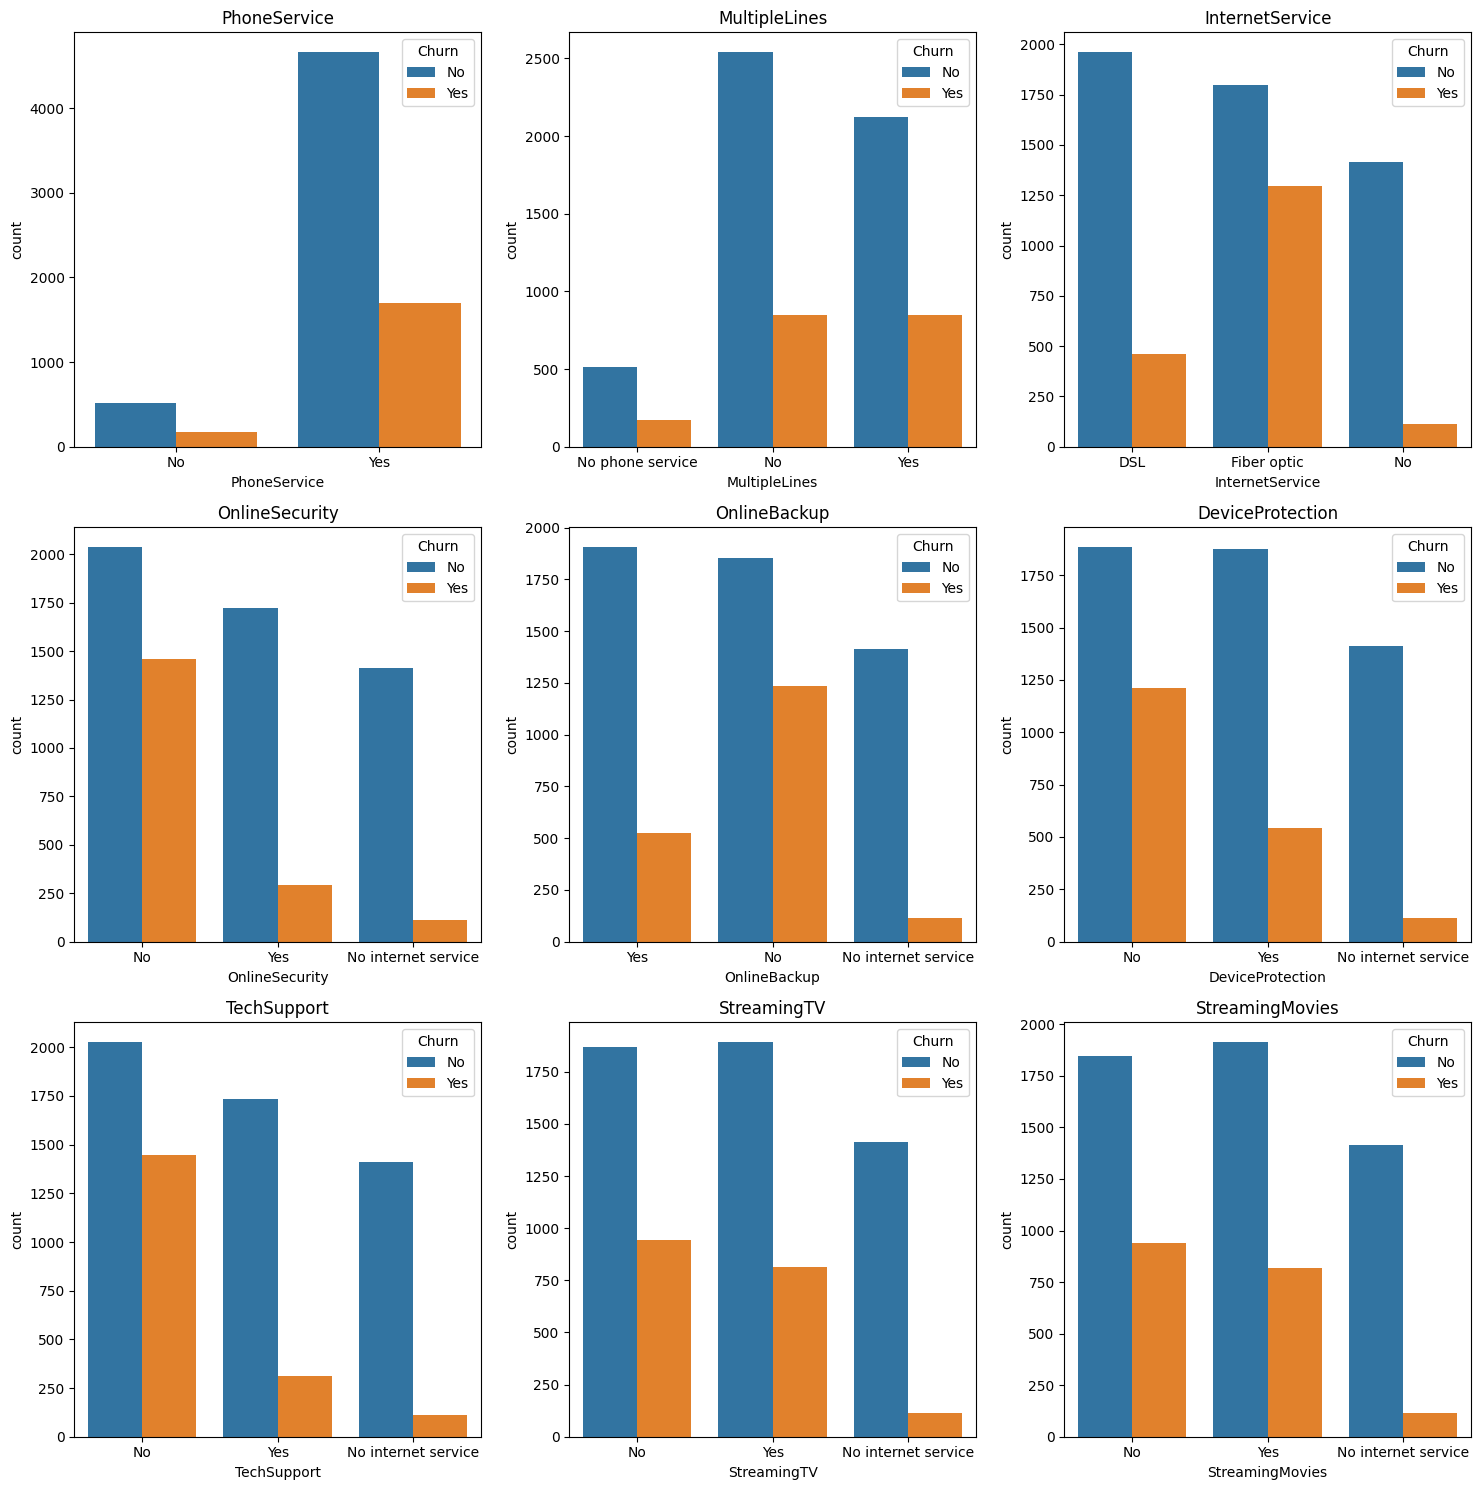

In [21]:
# Assuming df is your DataFrame

columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Calculate number of rows

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size as needed

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)  # Create subplot
    sns.countplot(x=column, data=df, hue='Churn')
    plt.title(column)
    #plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels if needed
    
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

 Generally, a higher proportion of customers who churn ('Yes') tend to have internet services, multiple phone lines, and streaming services.  Conversely, customers with online security, backup, device protection, and tech support are less likely to churn, suggesting these services may contribute to customer retention.

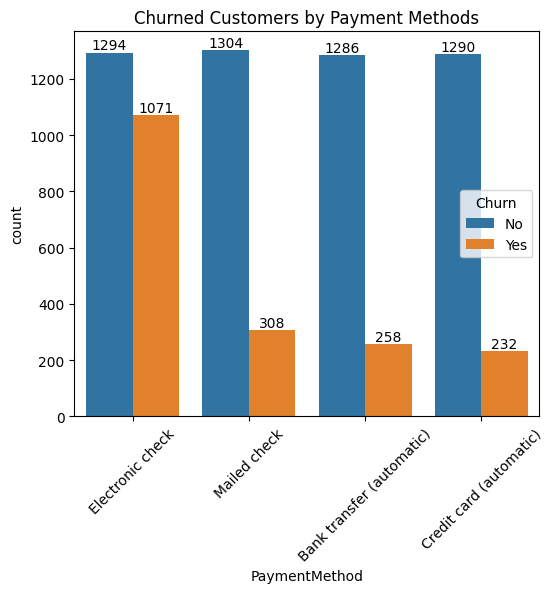

In [22]:
plt.figure(figsize= (6,5))
cc = sns.countplot(x= 'PaymentMethod', data=df, hue='Churn')
cc.bar_label(cc.containers[0])
cc.bar_label(cc.containers[1])
plt.xticks(rotation = 45)
plt.title('Churned Customers by Payment Methods')
plt.show()

Customer is likely to churn when he is using electronic check as a payment method